In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('~/Documents/pair_learning/midterm_project/data files/clean_train.csv')
train.head()

,PassengerId,Survived,Ticket_class,Sex,Age,Sib_spouse,Parent_child,Fare,Embarked,relatives
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,1,26.0,0,0,7.9250,0,0
3,4,1,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0


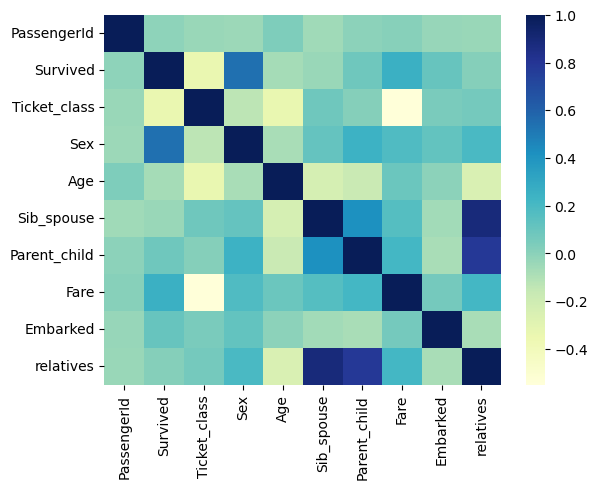

In [4]:
numeric_columns = train.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), cmap="YlGnBu")

plt.show()

In [5]:
numeric_columns = train.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
correlation_matrix

,PassengerId,Survived,Ticket_class,Sex,Age,Sib_spouse,Parent_child,Fare,Embarked,relatives
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033632,-0.057527,-0.001652,0.012658,-0.030467,-0.040143
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.067814,-0.035322,0.081629,0.257307,0.106811,0.016639
Ticket_class,-0.035144,-0.338481,1.000000,-0.131900,-0.334974,0.083081,0.018443,-0.549500,0.045702,0.065997
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.082949,0.114631,0.245489,0.182333,0.116569,0.200988
Age,0.033632,-0.067814,-0.334974,-0.082949,1.000000,-0.232978,-0.176486,0.093706,0.000615,-0.247402
Sib_spouse,-0.057527,-0.035322,0.083081,0.114631,-0.232978,1.000000,0.414838,0.159651,-0.059961,0.890712
Parent_child,-0.001652,0.081629,0.018443,0.245489,-0.176486,0.414838,1.000000,0.216225,-0.078665,0.783111
Fare,0.012658,0.257307,-0.549500,0.182333,0.093706,0.159651,0.216225,1.000000,0.062142,0.217138
Embarked,-0.030467,0.106811,0.045702,0.116569,0.000615,-0.059961,-0.078665,0.062142,1.000000,-0.080281
relatives,-0.040143,0.016639,0.065997,0.200988,-0.247402,0.890712,0.783111,0.217138,-0.080281,1.000000


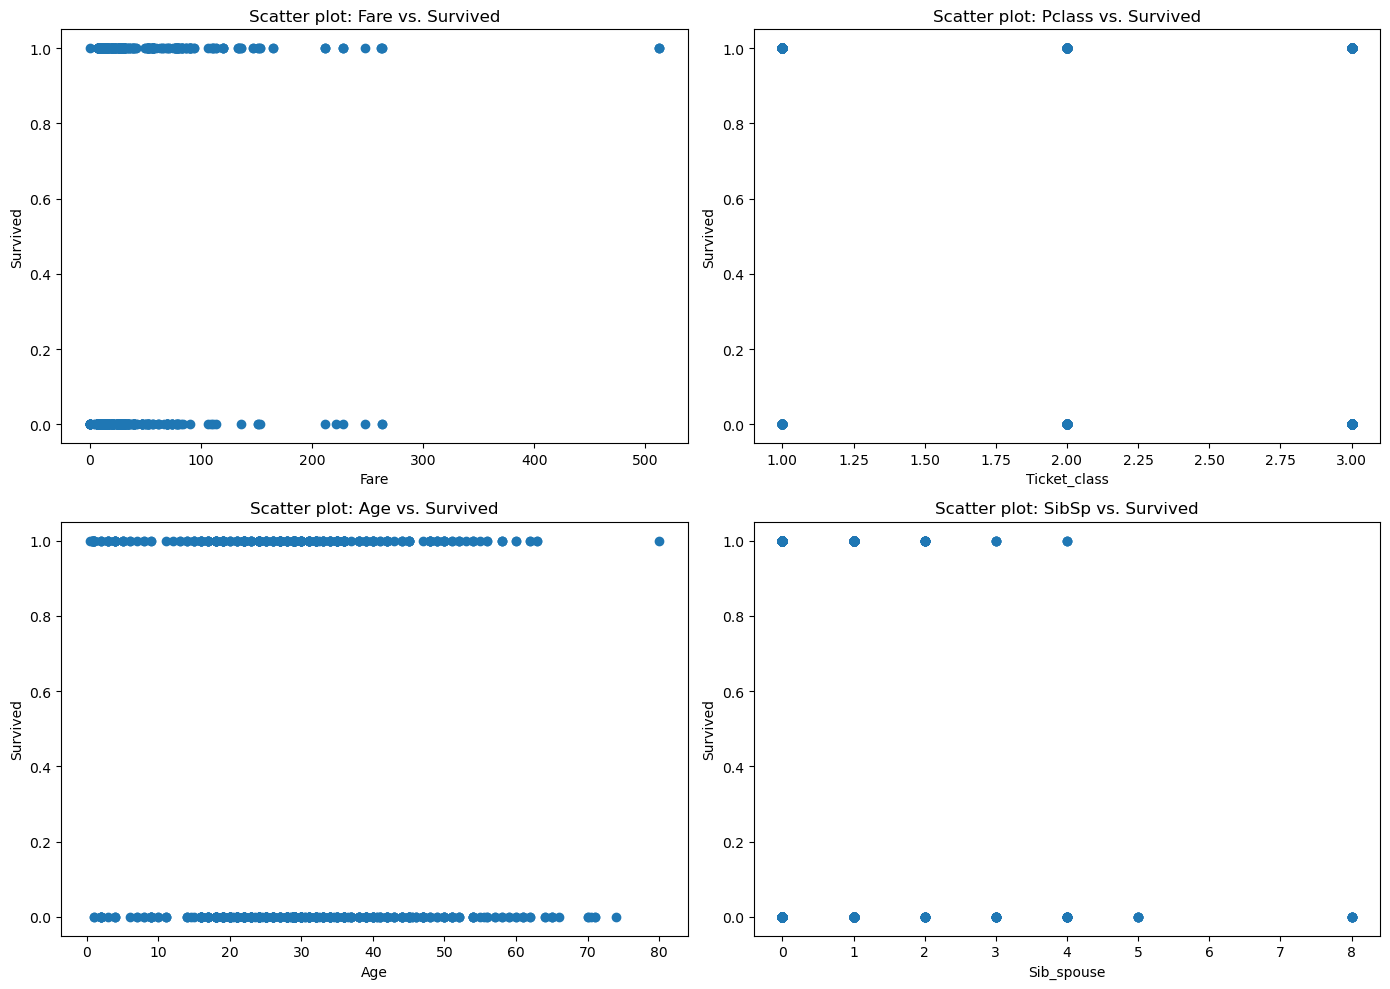

In [6]:
#further check for linearity using scatter plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot 0,0
axes[0, 0].scatter(train['Fare'], train['Survived'])
axes[0, 0].set_title('Scatter plot: Fare vs. Survived')
axes[0, 0].set_xlabel('Fare')
axes[0, 0].set_ylabel('Survived')

# Plot 0,1
axes[0, 1].scatter(train['Ticket_class'], train['Survived'])
axes[0, 1].set_title('Scatter plot: Pclass vs. Survived')
axes[0, 1].set_xlabel('Ticket_class')
axes[0, 1].set_ylabel('Survived')

# Plot 1,0
axes[1, 0].scatter(train['Age'], train['Survived'])
axes[1, 0].set_title('Scatter plot: Age vs. Survived')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Survived')

# Plot 1,1
axes[1, 1].scatter(train['Sib_spouse'], train['Survived'])
axes[1, 1].set_title('Scatter plot: SibSp vs. Survived')
axes[1, 1].set_xlabel('Sib_spouse')
axes[1, 1].set_ylabel('Survived')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [7]:
#check the level of significance of correlations
import scipy

stat, p1 = scipy.stats.pearsonr(train["Age"], train["Survived"])
stat, p2 = scipy.stats.pearsonr(train["Ticket_class"], train["Survived"])
stat, p3 = scipy.stats.pearsonr(train["Sib_spouse"], train["Survived"])

print(p1, p2, p3)

0.04300040105433477 2.537047387981486e-25 0.292243928698295


This shows that the p-values for Age/survived and Ticket_class/survived are significant but not the Sib_spouse/survived.
It can also be inferred that this does not satisfy the linearity assumption for Regression model.

SIMPLE LINEAR REGRESSION MODEL

In [8]:
#Linear rregession model Survived as dependent variabl and Ticket_class as independent variable
import statsmodels.api as sm
y = train["Survived"]
X = train["Ticket_class"]
X = sm.add_constant(X)
X.head()

,const,Ticket_class
0,1.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,1.0,3


In [9]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     115.0
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           2.54e-25
Time:                        15:49:37   Log-Likelihood:                -567.75
No. Observations:                 891   AIC:                             1140.
Df Residuals:                     889   BIC:                             1149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8386      0.045     18.597   

In [10]:
residuals = results.resid
residuals

0     -0.247644
1      0.358365
2      0.752356
3      0.358365
4     -0.247644
         ...   
886   -0.444639
887    0.358365
888   -0.247644
889    0.358365
890   -0.247644
Length: 891, dtype: float64

CHECK FOR NORMALITY

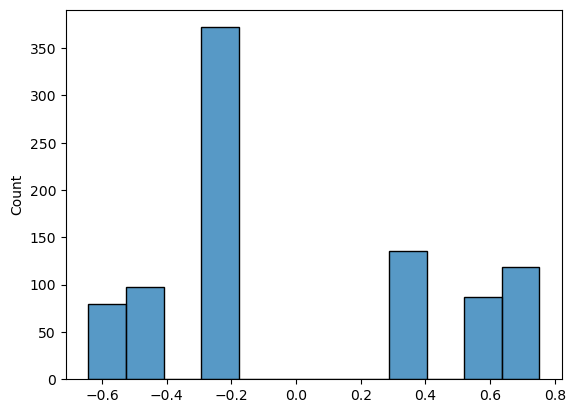

In [11]:
sns.histplot(residuals)
plt.show()

This looked like if we had more data points, this could give is a normal distribution

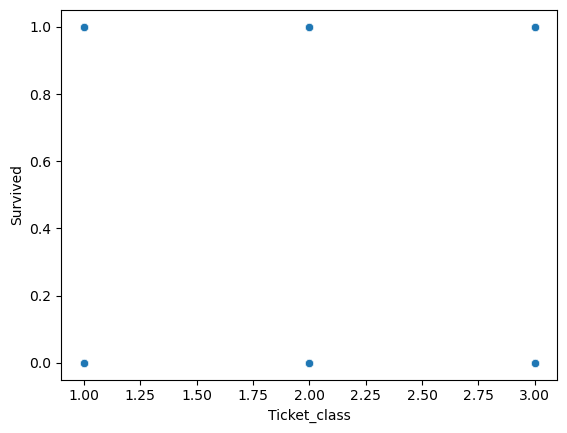

In [12]:
sns.scatterplot(data=train, x="Ticket_class", y='Survived')
plt.show()

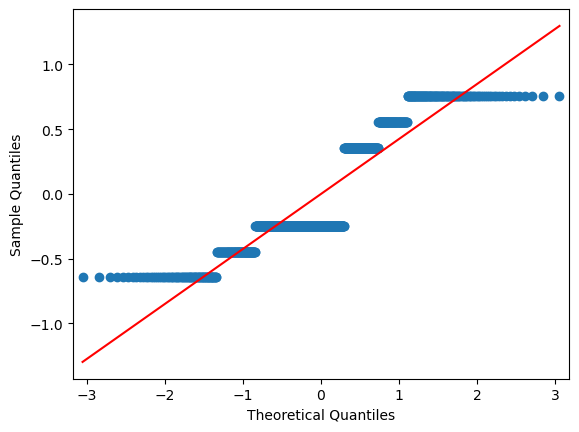

In [13]:
#check how well data points fit into the line
sm.qqplot(residuals, line="r")
plt.show()

In [14]:
import scipy
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.8452541828155518, pvalue=1.3488204624679827e-28)

Th p-vale is significantly smaller than any commom alpha level (0.05), hence we can conclude that the p-vale is statistically significant
Tghis shows that the residuals are not normally distributed. Since the 

HOMOSCEDASCITY

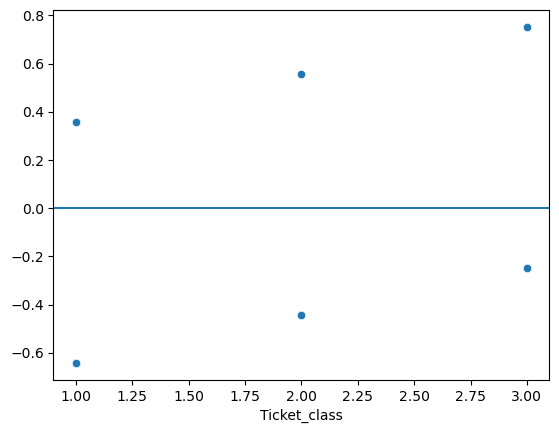

In [15]:
ax = sns.scatterplot(x=train["Ticket_class"], y=residuals)
ax.axhline(0)

Ho: Homoscedascity is present
Ha: Homoscedascity is absent

In [16]:
stat, p, f_stat, f_p = sm.stats.diagnostic.het_breuschpagan(residuals,results.model.exog)
print(p, f_p)

6.166125973652259e-05 5.8461850790634675e-05


the p-vale is greater than 0.05, Hence Hosmoscedascity assumption is satisfied. since we can't reject the null hypotheseis

LINEAR REGRESSION WITH AGE AS INDEPENDENT VARIABLE

In [17]:
#Linear rregession model Survived as dependent variable and Age as independent variable
import statsmodels.api as sm
y = train["Survived"]
X = train["Age"]
X = sm.add_constant(X)
X.head()

,const,Age
0,1.0,22.0
1,1.0,38.0
2,1.0,26.0
3,1.0,35.0
4,1.0,35.0


In [18]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.107
Date:                Thu, 13 Jul 2023   Prob (F-statistic):             0.0430
Time:                        15:49:58   Log-Likelihood:                -619.91
No. Observations:                 891   AIC:                             1244.
Df Residuals:                     889   BIC:                             1253.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4588      0.040     11.349      0.0

In [19]:
residuals = results.resid
residuals

0     -0.403021
1      0.637576
2      0.607128
3      0.629964
4     -0.370036
         ...   
886   -0.390334
887    0.589367
888   -0.385260
889    0.607128
890   -0.377648
Length: 891, dtype: float64

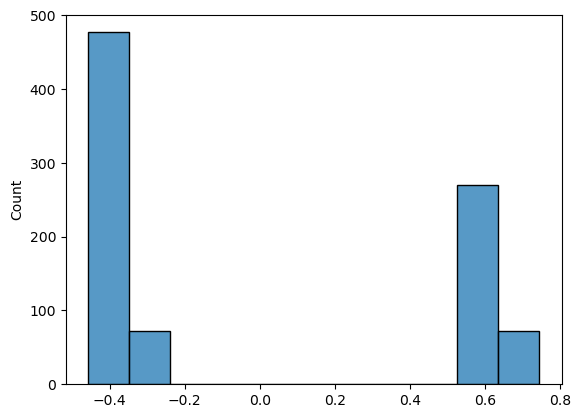

In [21]:
#check normality
sns.histplot(residuals)
plt.show()

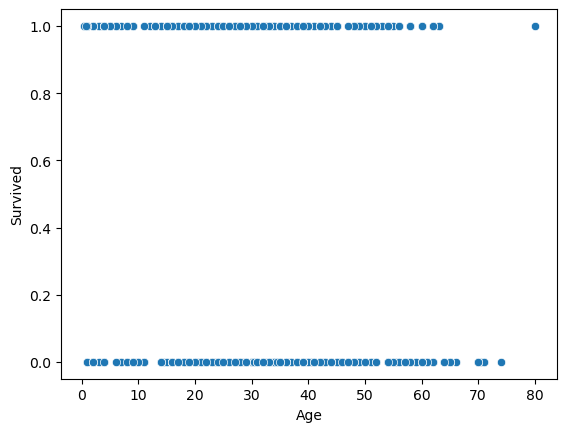

In [22]:

sns.scatterplot(data=train, x="Age", y='Survived')
plt.show()

In [23]:
stat, p, f_stat, f_p = sm.stats.diagnostic.het_breuschpagan(residuals,results.model.exog)
print(p, f_p)

0.3095752644891464 0.31011470263524366


the p-vale is greater than 0.05, Hence Hosmoscedascity assumption is satisfied. since we can't reject the null hypotheseis

MULTIVARIANT REGRESSION MODEL, WITH AGE AND TICKET_CLASS AS INDEPENDENT VARIABLES

In [24]:
y = train["Survived"]
X = train[["Ticket_class", 'Age']]
X = sm.add_constant(X)
X.head()

,const,Ticket_class,Age
0,1.0,3,22.0
1,1.0,1,38.0
2,1.0,3,26.0
3,1.0,1,35.0
4,1.0,3,35.0


In [25]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     79.31
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           2.04e-32
Time:                        15:57:59   Log-Likelihood:                -548.75
No. Observations:                 891   AIC:                             1103.
Df Residuals:                     888   BIC:                             1118.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1562      0.068     17.128   

In [26]:
residuals = results.resid
residuals

0     -0.277868
1      0.370744
2      0.752677
3      0.347835
4     -0.178595
         ...   
886   -0.476471
887    0.225652
888   -0.224413
889    0.279107
890   -0.201504
Length: 891, dtype: float64

<Axes: ylabel='Count'>

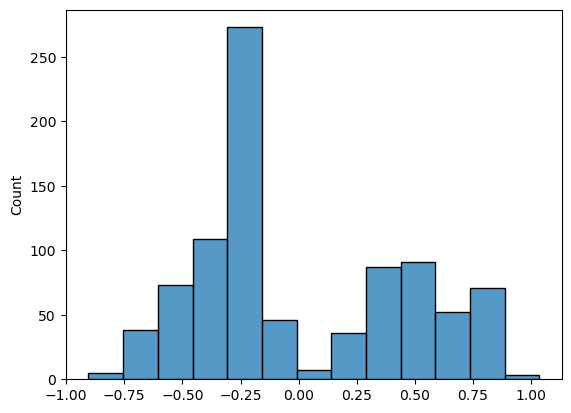

In [27]:
#distribution
sns.histplot(residuals)

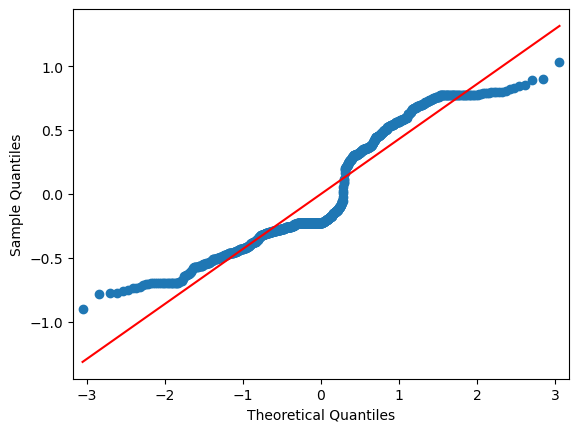

In [28]:
sm.qqplot(residuals, line="r")
plt.show()

In [29]:
import scipy
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.9077146649360657, pvalue=8.577711238445605e-23)

p-value greater than 0.05, assumpttion for homoscedascity is satisfied